In [1]:
import io
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [2]:
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['HR_comma_sep.csv']))

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [7]:
import pandas  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
print(df['left'].unique())


[1 0]


In [16]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


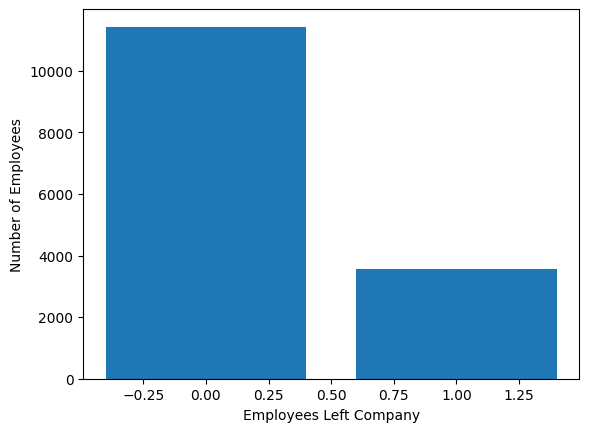

In [18]:
# Let's check how many employees were left?

left_count = df.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level']) 
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()


In [19]:
df.left.value_counts()

,count
left,
0,11428
1,3571


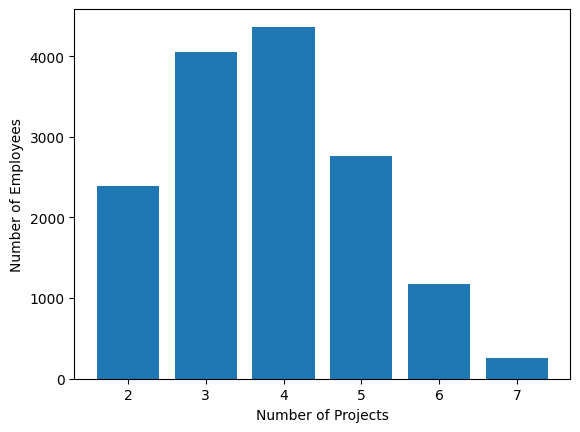

In [21]:
num_projects = df.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

# Most of the employees are doing the project from 3-5.

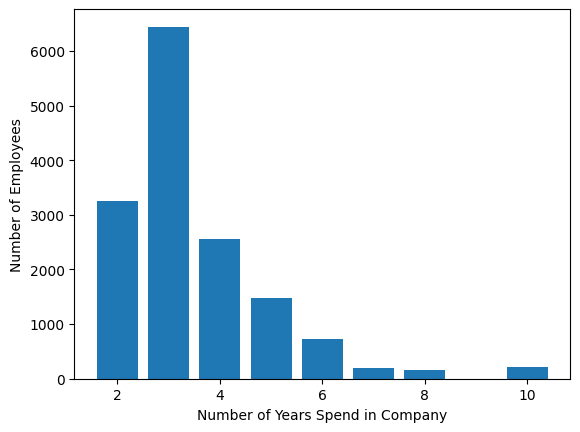

In [22]:
time_spent = df.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

# Most of the employees experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

<ipython-input-24-693f4a971636>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i + 1)


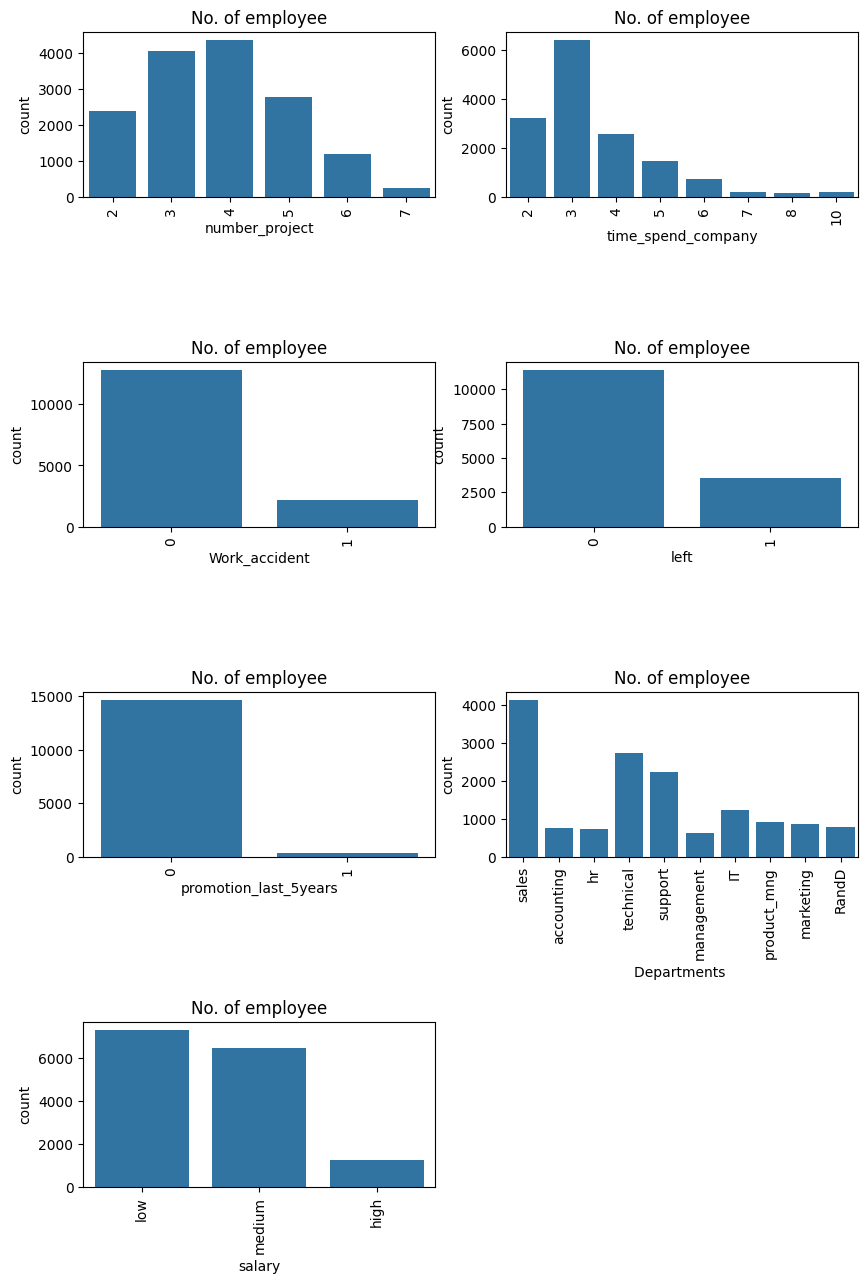

In [24]:
features = ['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig = plt.subplots(figsize = (10, 15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i + 1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x = j,data = df)
    plt.xticks(rotation = 90)
    plt.title("No. of employee")


<ipython-input-25-b5160cf73b89>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i +1 )


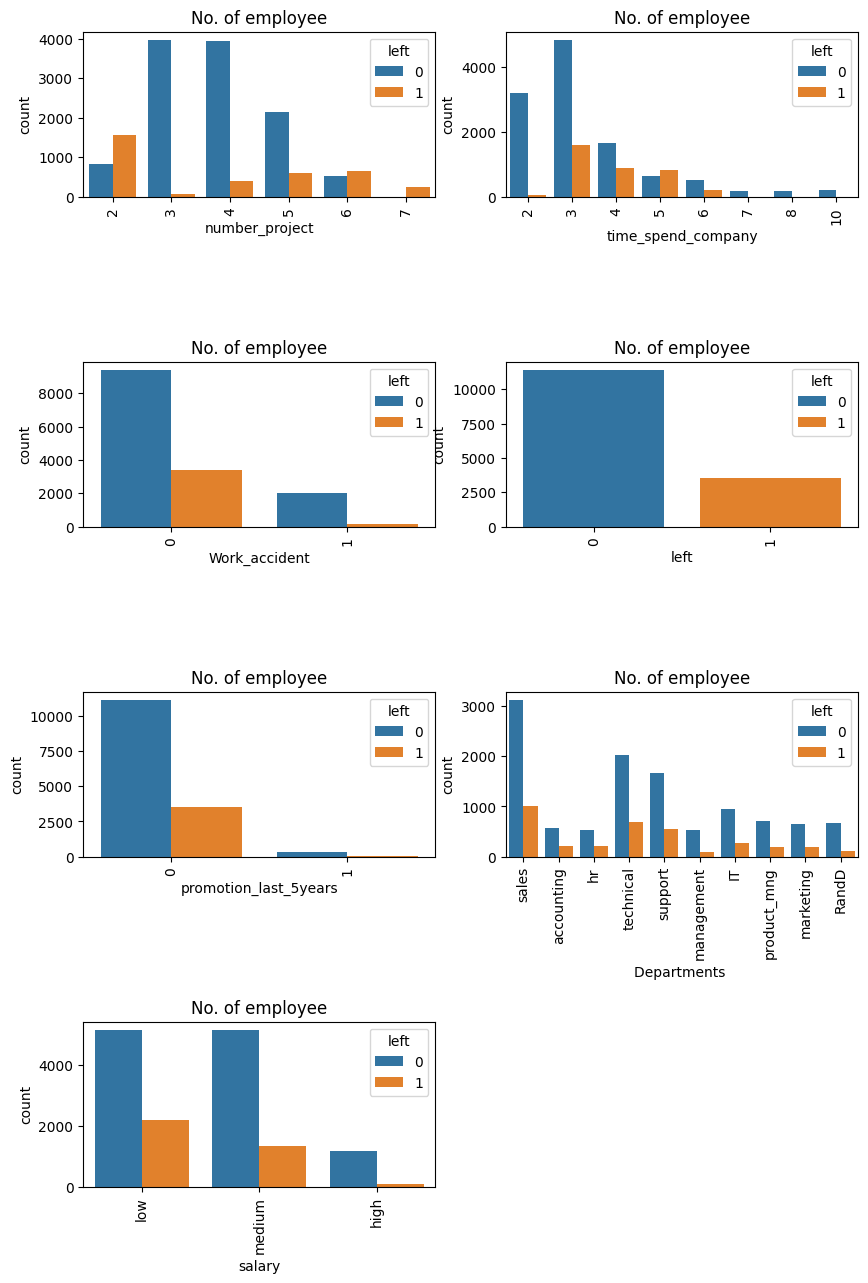

In [25]:
fig = plt.subplots(figsize = (10, 15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i + 1 )
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x = j, data = df, hue = 'left')
    plt.xticks(rotation = 90)
    plt.title("No. of employee")

In [26]:
# Cluster Analysis:
# Let's find out the groups of employees who left. The most important factor for any employee to stay or leave is satisfaction and performance in the company
# , so let's bunch them in the group of people using cluster analysis.

from sklearn.cluster import KMeans
left_emp =  df[['satisfaction_level', 'last_evaluation']][df.left == 1] 
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


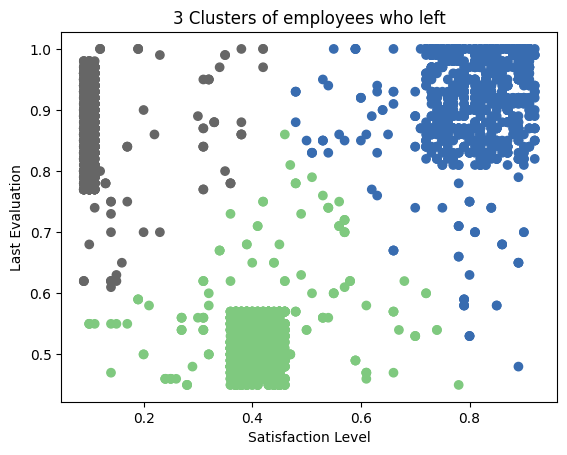

In [27]:
# Add new column "label" annd assign cluster labels:
left_emp['label'] = kmeans.labels_

# Draw scatter plot:
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c = left_emp['label'], cmap = 'Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()